This notebook is part of the PyImageJ [Tutorial Series](./notebooks.rst), and assumes familiarity with the ImageJ API. Dedicated tutorials for ImageJ can be found [here](https://imagej.net/tutorials/).

# 10 Using ImageJ Ops

Here we will look at a quick image processing example with [ImageJ Ops](https://imagej.net/libs/imagej-ops), ImageJ2's curated collection of image processing routines.

<table><tr><td>

💡 If ImageJ Ops is completely new to you, please read the [ImageJ Ops tutorial notebook](https://github.com/imagej/tutorials/blob/2022-04/notebooks/1-Using-ImageJ/2-ImageJ-Ops.ipynb) to get a feel for Ops before proceeding.

</td></tr></table>

In this scenario, we are interested in running the [tubeness](https://imagej.net/plugins/tubeness) filter to perform some edge detection. First we need to initialize PyImageJ.

In [1]:
import imagej

# initialize ImageJ
ij = imagej.init()
print(f"ImageJ version: {ij.getVersion()}")

ImageJ version: 2.14.0/1.54f


ImageJ Ops contains a lot of functions. To find out what is available you can visit the ImageJ Ops JavaDoc [here](https://javadoc.scijava.org/ImageJ2/net/imagej/ops/package-summary.html). Alternatively you can also just search ImageJ Ops like so (in this case we are interested in the "tubeness" filter):

In [2]:
[op for op in ij.op().ops() if "tube" in op]

['filter.tubeness']

Now we know that there is indeed a "tubeness" filter we should check what parameters the "tubeness" Op takes. To do this, use ImageJ Op's help function to print out the Op's parameter requirements.

In [3]:
ij.op().help("filter.tubeness")

'Available operations:
	(IterableInterval out?) =
	net.imagej.ops.filter.tubeness.DefaultTubeness(
		IterableInterval out?,
		RandomAccessibleInterval in,
		double sigma,
		double[] calibration)'

The `ij.op().help()` output provides important information about the requested Op like its complete signature: `net.imagej.ops.filter.tubeness.DefaultTubness`. With the signature we can find the "tubeness" Op in the SciJava JavaDoc ([DefaultTubness JavaDoc](https://javadoc.scijava.org/ImageJ2/net/imagej/ops/filter/tubeness/DefaultTubeness.html)) to find more details about the Op and it's parameters.

The help output also indicates that the "tubeness" Op has 1 optional and 3 required parameters:

- `IterableInterval out?`: Optional output image for result (this Op will generate a new output image for you)
- `RandomAccessibleInterval in`: Required input image
- `double sigma`: Required decimal value
- `double [] calibration`: Required List of doubles (the tubeness Op assumes a list of 1s if an empty list is passed)

Now that we know all the details we need to use the "tubeness" Op. There are two ways you can run ImageJ Ops with PyImageJ: (1) You can pass the Op name (_i.e._ "filter.tubeness") to the `ij.op().run()` method along with the Op's parameters. Although it is not always required, sometimes these parameters need to be wrapped with the `ij.py.jargs()` method to convert the Python arguments into Java ones. (2) Call the Op directly using its namespace, `ij.op().filter().tubeness()`, along with its required parameters. There is no difference between these two approaches to running Ops.


Operating in headless mode - the original ImageJ will have limited functionality.


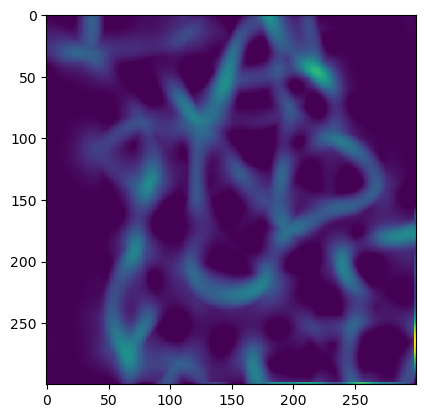

In [4]:
# run tubeness op with ij.op().run()
def tubeness_1(image, sigma, calibration=[]):
    return ij.op().run("filter.tubeness", ij.py.jargs(image, sigma, calibration))

image_1 = ij.io().open('sample-data/test_still.tif')
ij.py.show(tubeness_1(image_1, sigma=10))

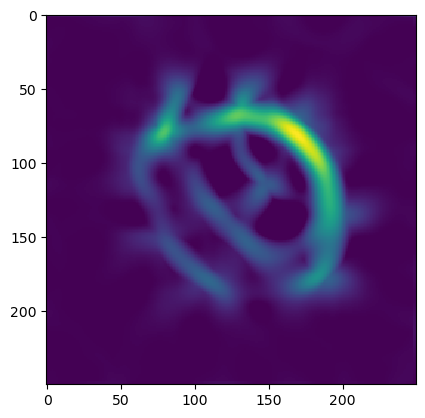

In [5]:
# run tubeness op with filter namespace
def tubeness_2(image, sigma, calibration=[]):
    return ij.op().filter().tubeness(image, sigma, calibration)

image_2 = ij.io().open('sample-data/test_image.tif')
ij.py.show(tubeness_2(image_2, sigma=10))

Now let's combine this "tubeness" filter Op with a `ipywidgets` slider (see [06 Working with Images](06-Working-with-Images.ipynb)) to test different sigmas dynamically:

In [6]:
import ipywidgets

def recalc(**kwargs):
    ij.py.show(tubeness_1(image_1, kwargs['sigma']), cmap='magma')
sigma_slider = ipywidgets.IntSlider(description="sigma", min=1, max=20, value=10, continuous_update=True)
ipywidgets.interact(recalc, sigma=sigma_slider)

interactive(children=(IntSlider(value=10, description='sigma', max=20, min=1), Output()), _dom_classes=('widge…

<function __main__.recalc(**kwargs)>